# HYPERPARAMETER SPACE COVERAGE BY `OPTUNA` OPTIMIZATION

In this notebook we check the hyperparameter space coverage by `optuna` optimization.

## Modules and configuration

### Modules

In [2]:
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.lines import Line2D

import seaborn as sns
sns.set_style("white", {'figure.figsize':(15,10)})

### Configuration

In [3]:
OPT_DATA_IN = "../data/ML_MODELS/Results_DecisionTree/DT_Scaled_Optuna_Trials.csv"

#HAPARAM_COVER_FIG = "../data/ML_MODELS/Results_DecisionTree/DT_Scaled_Optuna_Img_HParamsCover.csv"

# Ranges used for hyperparameters with 'optuna':
#HPARAM_RANGES = {
#    'max_depth': (1, 7),
#    'min_samples_leaf': (5, 10),
#    'ccp_alpha': (0.005, 0.500)
#}

IMG_FOLDER = "./img/"

### Functions

In [19]:
def draw_scatter_plot(data, x, y, fig_title=None, fig_filename=None, **kwargs):
    '''Draws and saves a scatter plot'''
    ax = sns.scatterplot(data, x=x, y=y, **kwargs)
    ax.figure.set_size_inches(10, 6)
    curr_xlim = ax.get_xlim()
    new_xlim = (curr_xlim[0] - 0.1 * (curr_xlim[1] - curr_xlim[0]),
                curr_xlim[1] + 0.1 * (curr_xlim[1] - curr_xlim[0]))
    curr_ylim = ax.get_ylim()
    new_ylim = (curr_ylim[0] - 0.1 * (curr_ylim[1] - curr_ylim[0]),
                curr_ylim[1] + 0.1 * (curr_ylim[1] - curr_ylim[0]))
    ax.set_xlim(new_xlim)
    ax.set_ylim(new_ylim)
    if fig_title is None:
        fig_title = "Optimization hyperparameter coverage: '" + x + "' and '" + y + "'"
    else:
        pass
    ax.set_title(fig_title, fontsize=16)
    ax.set_xlabel(x, fontsize=12)
    ax.set_ylabel(y, fontsize=12)
    ax.legend(title='Precision avg')
    if fig_filename is None:
        pass
    else:
        plt.savefig(fig_filename, format='jpg');

## Load optimization run data

In [5]:
OPT_DATA_IN

'../data/ML_MODELS/Results_DecisionTree/DT_Scaled_Optuna_Trials.csv'

In [6]:
trial_data = pd.read_csv(OPT_DATA_IN, sep=',', decimal='.')
trial_data

,number,value,datetime_start,datetime_complete,duration,params_ccp_alpha,params_max_depth,params_min_samples_leaf,state
0,0,0.000000,2023-03-01 18:02:00.921317,2023-03-01 18:02:00.975200,0 days 00:00:00.053883,0.335,1,8,COMPLETE
1,1,0.000000,2023-03-01 18:02:00.976197,2023-03-01 18:02:01.054989,0 days 00:00:00.078792,0.095,4,5,COMPLETE
2,2,0.000000,2023-03-01 18:02:01.055990,2023-03-01 18:02:01.123802,0 days 00:00:00.067812,0.420,3,7,COMPLETE
3,3,0.000000,2023-03-01 18:02:01.124811,2023-03-01 18:02:01.188629,0 days 00:00:00.063818,0.190,3,9,COMPLETE
4,4,0.000000,2023-03-01 18:02:01.189630,2023-03-01 18:02:01.270417,0 days 00:00:00.080787,0.470,5,10,COMPLETE
...,...,...,...,...,...,...,...,...,...
495,495,0.034500,2023-03-01 18:02:56.253900,2023-03-01 18:02:56.389537,0 days 00:00:00.135637,0.015,8,9,COMPLETE
496,496,0.000000,2023-03-01 18:02:56.390534,2023-03-01 18:02:56.536146,0 days 00:00:00.145612,0.025,8,9,COMPLETE
497,497,0.081276,2023-03-01 18:02:56.537143,2023-03-01 18:02:56.667793,0 days 00:00:00.130650,0.005,8,9,COMPLETE
498,498,0.034500,2023-03-01 18:02:56.668809,2023-03-01 18:02:56.798475,0 days 00:00:00.129666,0.015,8,9,COMPLETE


In [7]:
len(trial_data[trial_data['state'] == "COMPLETE"])

500

In [8]:
trial_data.rename(
    columns={
        'value': "Average precision training/test",
        'params_ccp_alpha': "ccp_alpha",
        'params_max_depth': "max_depth",
        'params_min_samples_leaf': "min_samples_leaf"},
    inplace=True
)
trial_data

,number,Average precision training/test,datetime_start,datetime_complete,duration,ccp_alpha,max_depth,min_samples_leaf,state
0,0,0.000000,2023-03-01 18:02:00.921317,2023-03-01 18:02:00.975200,0 days 00:00:00.053883,0.335,1,8,COMPLETE
1,1,0.000000,2023-03-01 18:02:00.976197,2023-03-01 18:02:01.054989,0 days 00:00:00.078792,0.095,4,5,COMPLETE
2,2,0.000000,2023-03-01 18:02:01.055990,2023-03-01 18:02:01.123802,0 days 00:00:00.067812,0.420,3,7,COMPLETE
3,3,0.000000,2023-03-01 18:02:01.124811,2023-03-01 18:02:01.188629,0 days 00:00:00.063818,0.190,3,9,COMPLETE
4,4,0.000000,2023-03-01 18:02:01.189630,2023-03-01 18:02:01.270417,0 days 00:00:00.080787,0.470,5,10,COMPLETE
...,...,...,...,...,...,...,...,...,...
495,495,0.034500,2023-03-01 18:02:56.253900,2023-03-01 18:02:56.389537,0 days 00:00:00.135637,0.015,8,9,COMPLETE
496,496,0.000000,2023-03-01 18:02:56.390534,2023-03-01 18:02:56.536146,0 days 00:00:00.145612,0.025,8,9,COMPLETE
497,497,0.081276,2023-03-01 18:02:56.537143,2023-03-01 18:02:56.667793,0 days 00:00:00.130650,0.005,8,9,COMPLETE
498,498,0.034500,2023-03-01 18:02:56.668809,2023-03-01 18:02:56.798475,0 days 00:00:00.129666,0.015,8,9,COMPLETE


## Plots of hyperparameter coverage and precision

### `ccp_alpha` and `max_depth`

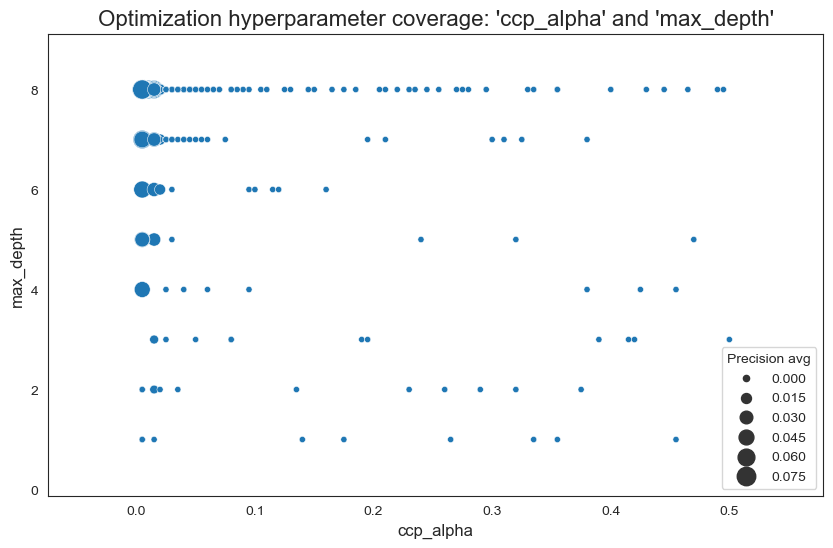

In [20]:
data=trial_data
x = 'ccp_alpha'
y = 'max_depth'
fig_title = None
fig_filename = IMG_FOLDER + "ML_70_01_HparamCoverage_md_ca.jpg"
kwargs = {
    'size': 'Average precision training/test',
    'sizes': (20, 200)
}
draw_scatter_plot(data=data, x=x, y=y,
                  fig_title=fig_title, fig_filename=fig_filename,
                  **kwargs)

### `ccp_alpha` and `min_samples_leaf`

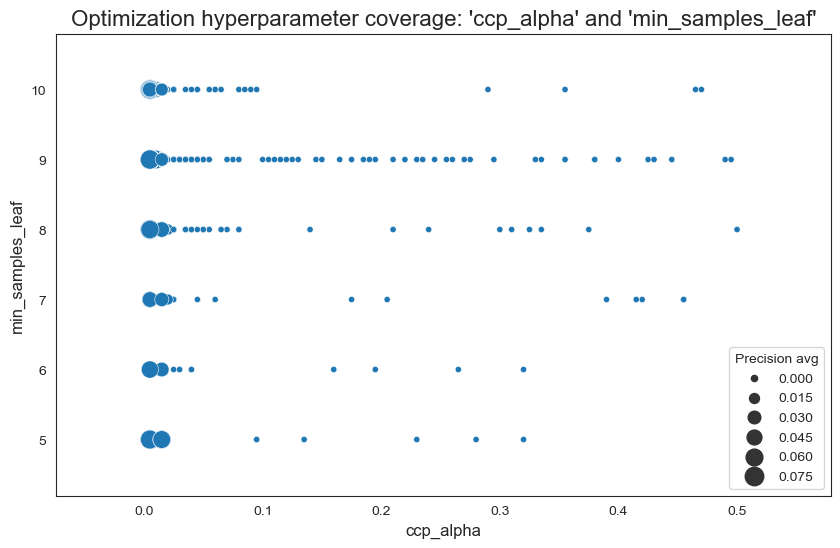

In [21]:
data=trial_data
x = 'ccp_alpha'
y = 'min_samples_leaf'
fig_title = None
fig_filename = IMG_FOLDER + "ML_70_02_HparamCoverage_msl_ca.jpg"
kwargs = {
    'size': 'Average precision training/test',
    'sizes': (20, 200)
}
draw_scatter_plot(data=data, x=x, y=y,
                  fig_title=fig_title, fig_filename=fig_filename,
                  **kwargs)

### `max_depth` and `min_samples_leaf`

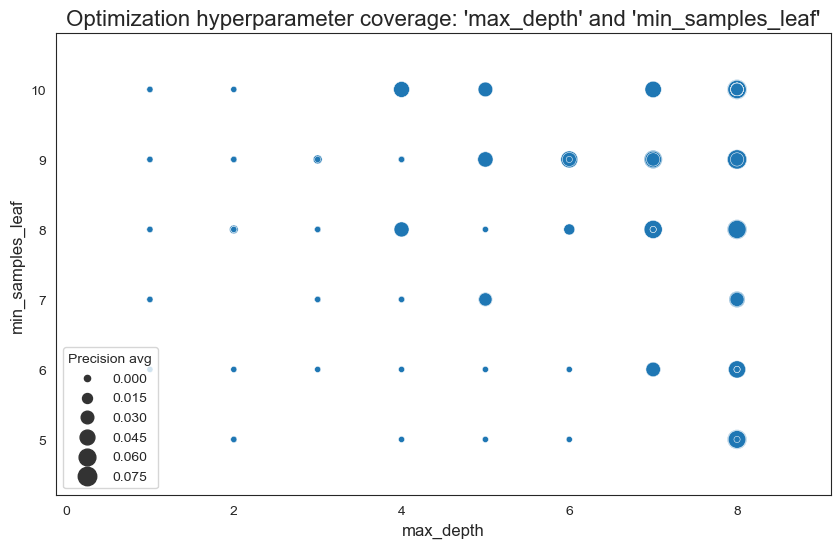

In [22]:
data=trial_data
x = 'max_depth'
y = 'min_samples_leaf'
fig_title = None
fig_filename = IMG_FOLDER + "ML_70_03_HparamCoverage_msl_md.jpg"
kwargs = {
    'size': 'Average precision training/test',
    'sizes': (20, 200)
}
draw_scatter_plot(data=data, x=x, y=y,
                  fig_title=fig_title, fig_filename=fig_filename,
                  **kwargs)

### 3D scatter plot: `max_depth`,  `min_samples_leaf` and `ccp_alpha`

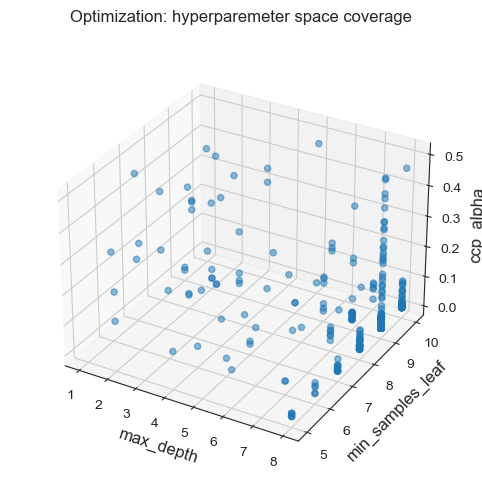

In [23]:
data=trial_data
x = 'max_depth'
y = 'min_samples_leaf'
z = 'ccp_alpha'
fig = plt.figure(figsize=(10, 6))
fig_filename = IMG_FOLDER + "ML_70_04_HparamCoverage_3D_md_msl_ca.jpg"

ax = fig.add_subplot(projection='3d')
ax.set_proj_type('persp')
ax.scatter(
    data[x], data[y], data[z],
#    sizes=2000 * data['Average precision training/test'],
    marker='o',
    alpha=0.5)
ax.set_xlabel(x, fontsize=12)
ax.set_ylabel(y, fontsize=12)
ax.set_zlabel(z, fontsize=12)
plt.title("Optimization: hyperparemeter space coverage")
ax.set_box_aspect(None, zoom=0.90)
#plt.tight_layout(w_pad=2.0)
plt.savefig(fig_filename, format='jpg')
plt.show()
